In [1]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
!pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you 

In [3]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import kagglehub

path = kagglehub.dataset_download("saathvik16/bdd10k-object-detection-with-yolo-format-labels")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels


In [5]:
data_yaml_content = """
train: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/images
val: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/images
test: /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/images

nc: 10

names:
  0: bike
  1: bus
  2: car
  3: motor
  4: person
  5: rider
  6: traffic light
  7: traffic sign
  8: train
  9: truck
"""
dataset_yaml_path = '/kaggle/working/data.yaml'
with open(dataset_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print(f"data.yaml created at: {dataset_yaml_path}")

data.yaml created at: /kaggle/working/data.yaml


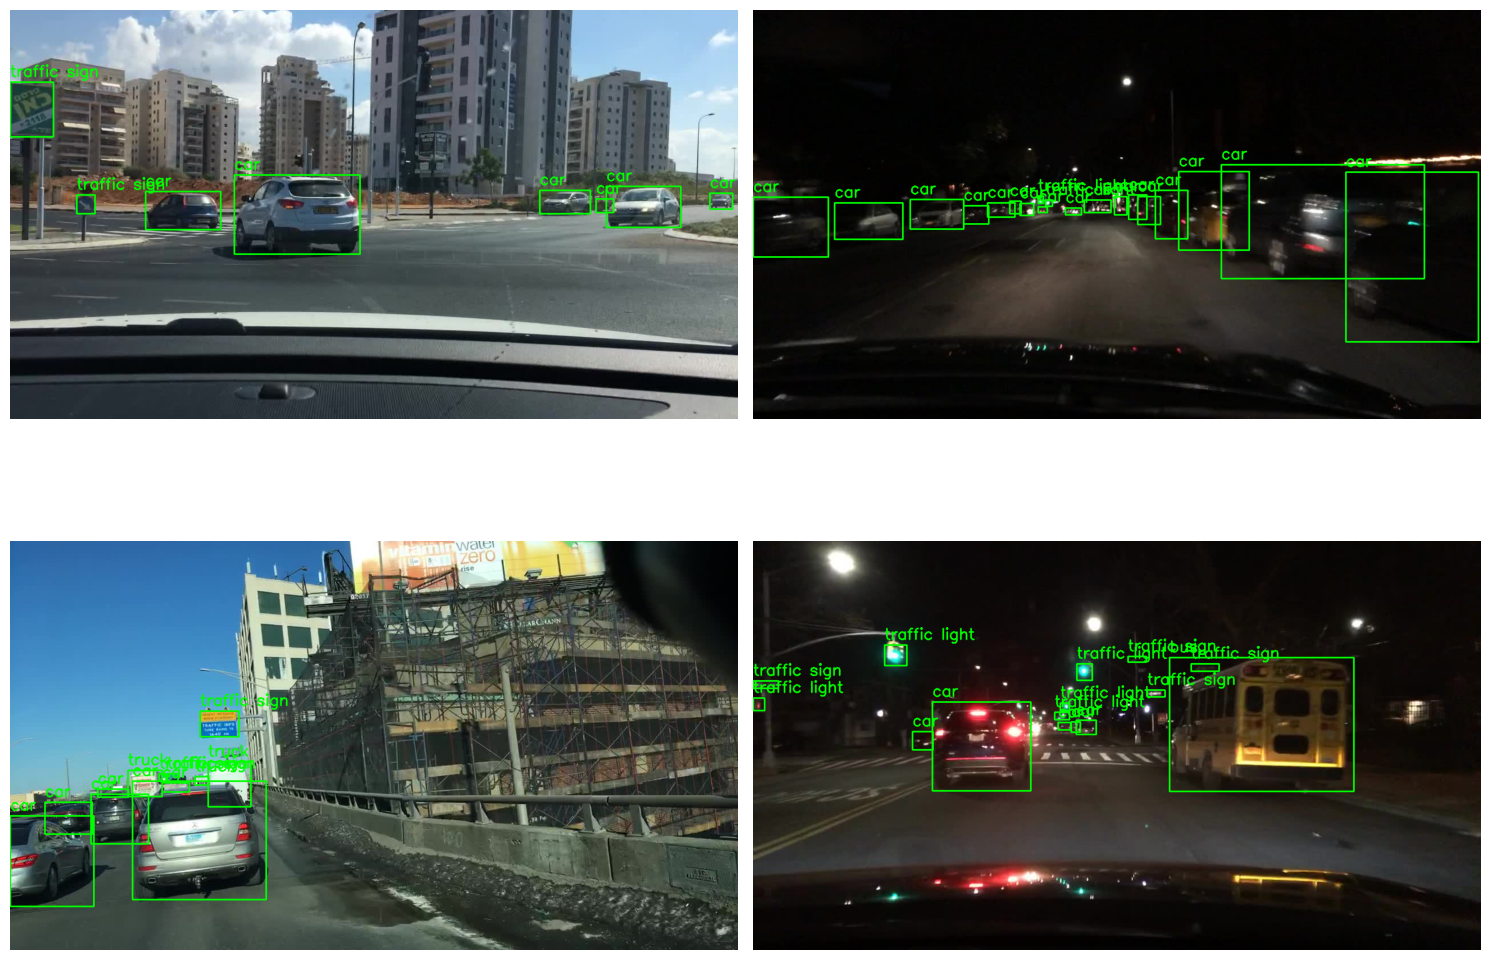

In [6]:
img_dir = '/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/images'
label_dir = '/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/train/labels'

class_names = [
    'bike', 'bus', 'car', 'motor', 'person', 'rider', 
    'traffic light', 'traffic sign', 'train', 'truck'
]

num_images_to_show = 4

image_files = os.listdir(img_dir)
random_images = random.sample(image_files, num_images_to_show)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() 

for i, img_filename in enumerate(random_images):
    img_path = os.path.join(img_dir, img_filename)
    label_path = os.path.join(label_dir, os.path.splitext(img_filename)[0] + '.txt')

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    h, w, _ = image.shape

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, box_width, box_height = map(float, parts[1:])

                abs_x_center = x_center * w
                abs_y_center = y_center * h
                abs_width = box_width * w
                abs_height = box_height * h

                x1 = int(abs_x_center - (abs_width / 2))
                y1 = int(abs_y_center - (abs_height / 2))
                x2 = int(x1 + abs_width)
                y2 = int(y1 + abs_height)

                label = class_names[class_id]
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
with open('/kaggle/working/yolov8m_early.yaml', 'w') as f:
    f.write("""nc: 10
scales:
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# Backbone up to layer 6
backbone:
  - [-1, 1, Conv, [64, 3, 2]]      # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]     # 1-P2/4
  - [-1, 3, C2f, [128, True]]      # 2
  - [-1, 1, Conv, [256, 3, 2]]     # 3-P3/8
  - [-1, 6, C2f, [256, True]]      # 4 <- P3 features
  - [-1, 1, Conv, [512, 3, 2]]     # 5-P4/16
  - [-1, 6, C2f, [512, True]]      # 6 <- EXIT POINT

# Dual-scale detection head (P3 and P4)
head:
  # P4 branch (from layer 6)
  - [-1, 1, Conv, [384, 3, 1]]     # 7 - reduce channels
  - [-1, 1, Conv, [384, 3, 1]]     # 8 - refine features
  
  # P3 branch (upsample and concat with layer 4)
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]  # 9
  - [[-1, 4], 1, Concat, [1]]                   # 10 - cat P3 from layer 4
  - [-1, 2, C2f, [256]]                         # 11 - process P3
  
  # P4 processing (from upsampled features)
  - [8, 1, Conv, [512, 3, 1]]                   # 12 - final P4 refinement
  
  # Dual-scale detection
  - [[11, 12], 1, Detect, [nc]]                 # 13 - Detect(P3, P4)
""")

In [8]:
final_exit_weights_path = "/kaggle/input/yolov8m-weights-trained-early-and-final/yolov8m_final_exit.pt"

In [9]:
model = YOLO('/kaggle/working/yolov8m_early.yaml')
model.load(final_exit_weights_path)

Transferred 181/279 items from pretrained weights


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [10]:
results = model.train(data='/kaggle/working/data.yaml', epochs=300, patience=30, imgsz=640, batch=64, device=[0, 1], freeze=7)

Ultralytics 8.3.218 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=7, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/yolov8m_early.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None,

In [11]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

In [12]:
results = model.val(
    data='/kaggle/working/data.yaml',
    split='test',                    
    imgsz=640,
    batch=64,
    device=[0, 1]
)

Ultralytics 8.3.218 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
YOLOv8m_early summary (fused): 53 layers, 10,172,036 parameters, 0 gradients, 60.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.2±4.0 MB/s, size: 56.9 KB)
val: Scanning /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test/labels... 2000 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2000/2000 193.2it/s 10.4s
WARNING ⚠️ val: Cache directory /kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 1.0it/s 31.5s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2000      36678      0.671      0.403      0.427      0.219
                  bike        139        214      0.547      0.374      0.371      0.153
                   bus        264        339      0.526      0.416      0.408      0.277
                   car       1981      20650      0.783      0.684      0.743      0.452
                 motor         71         85      0.563      0.306      0.304      0.116
                person        613       2355      0.679       0.51      0.552      0.254
                 rider        100        129      0.669      0.341      0.387      0.175
         traffic light       1112       5213      0.697       0.41      0.483      0.174
          traffic sign       1645       6798      0.695      0.491      0.551      0.273
                 train          3          3          1          0          0          0
                 truck        565        892      0.548      0.501      0.473      0.316
Speed: 0.6ms preproce

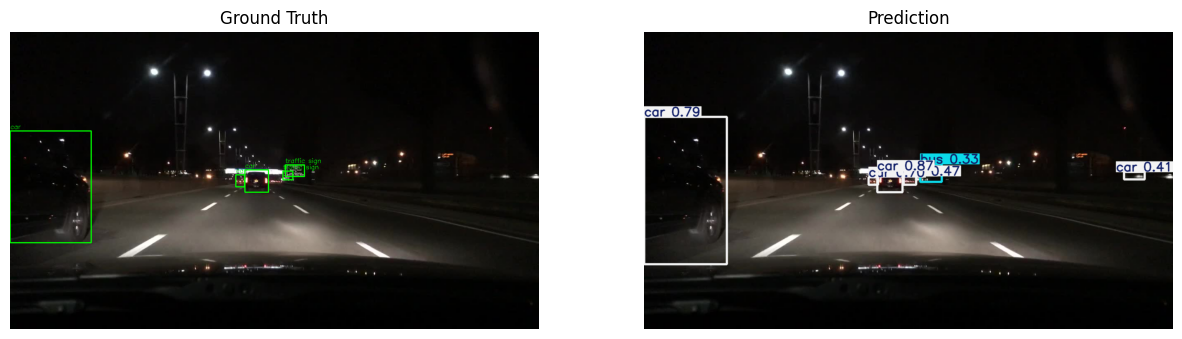

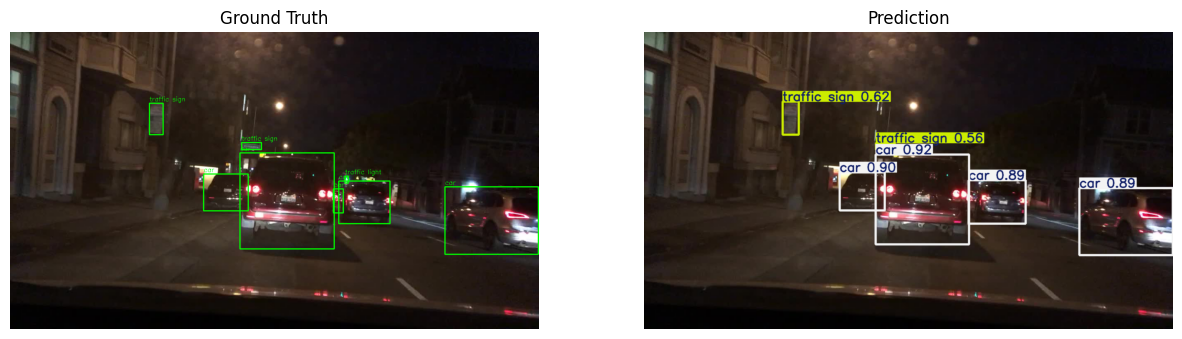

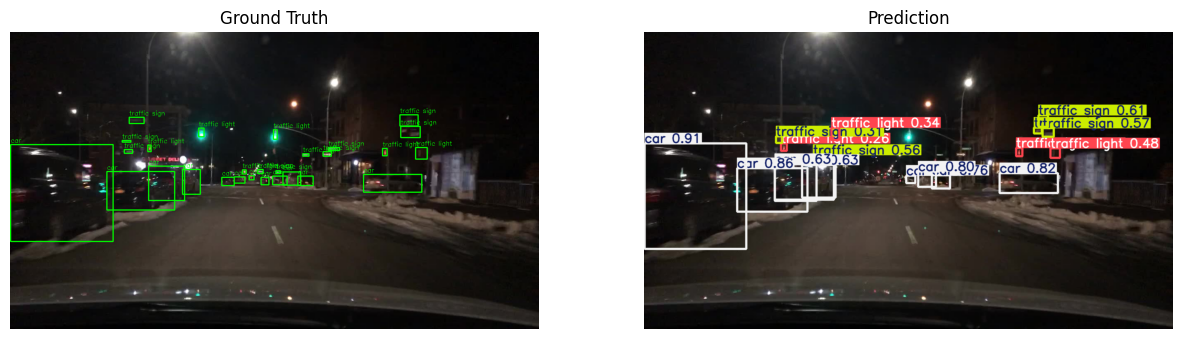

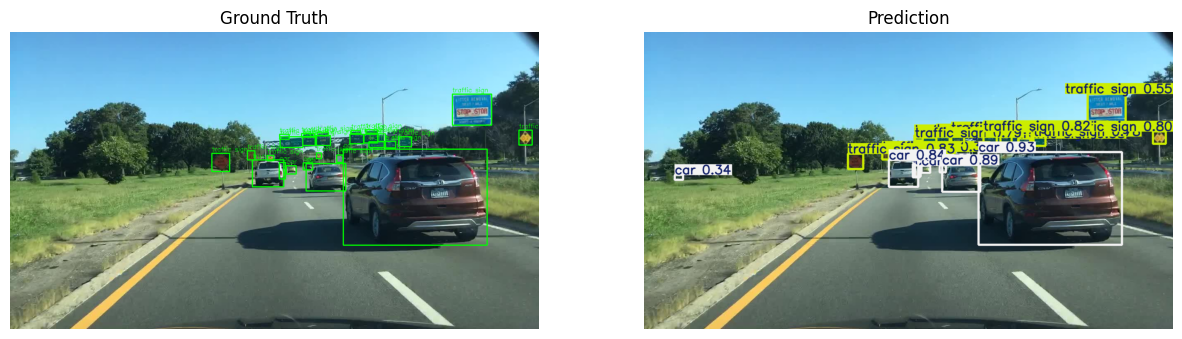

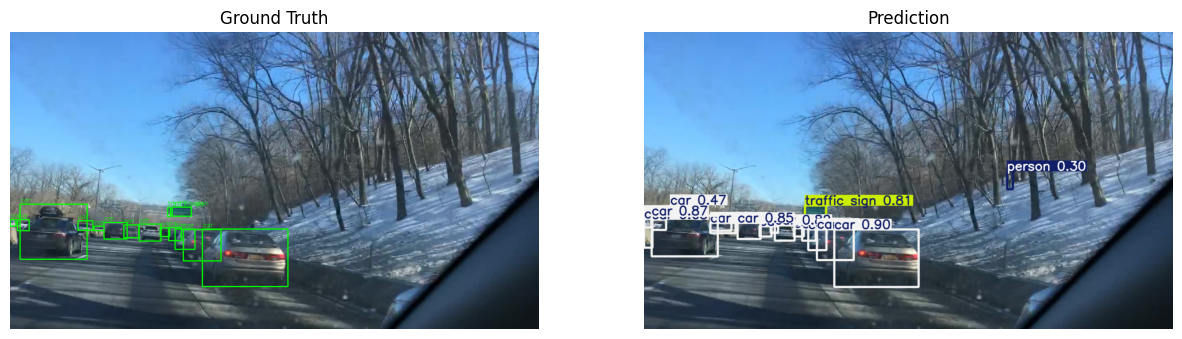

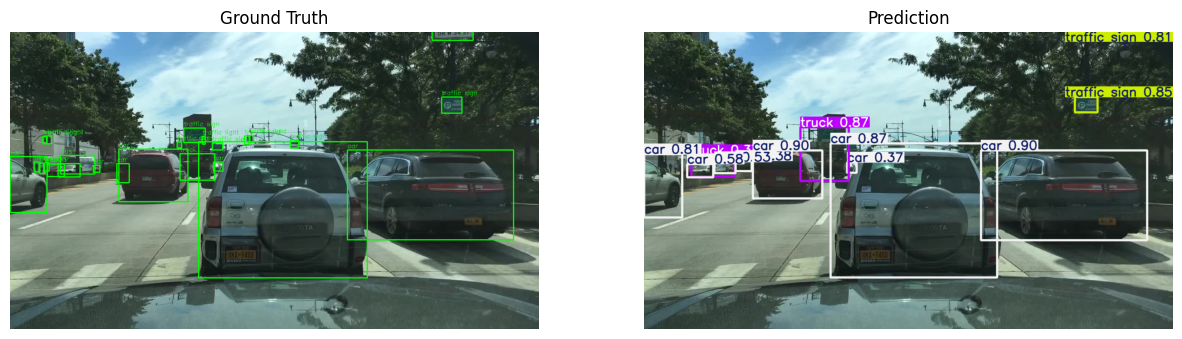

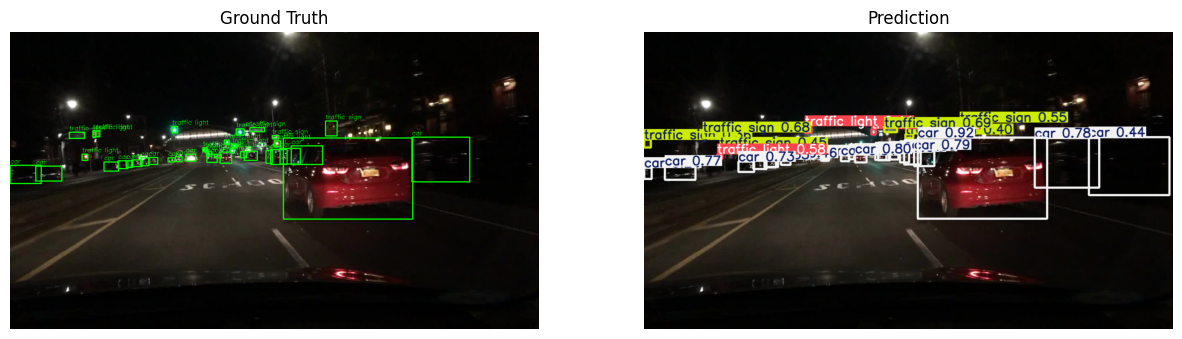

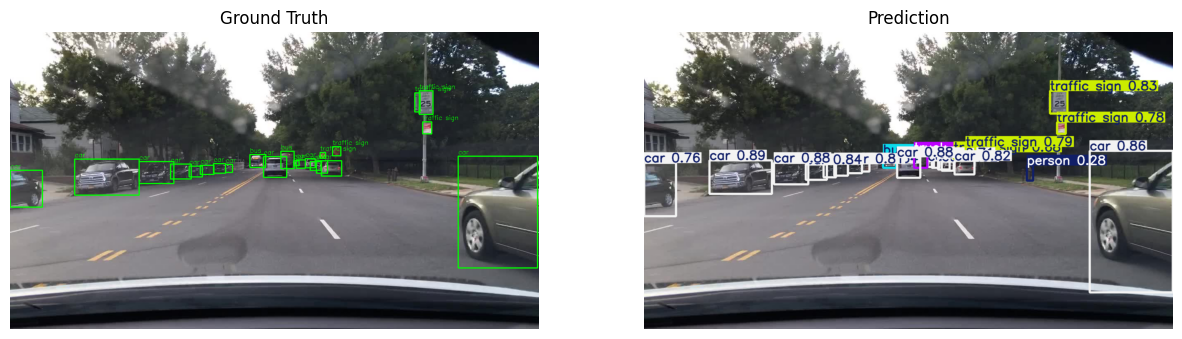

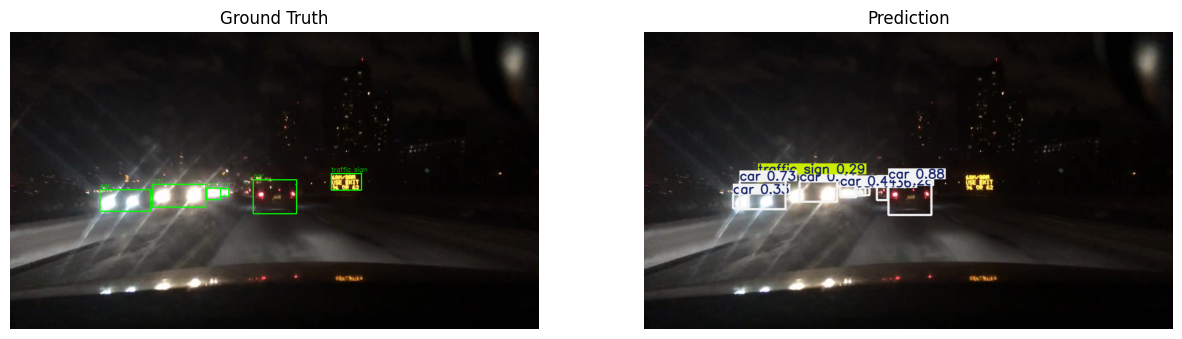

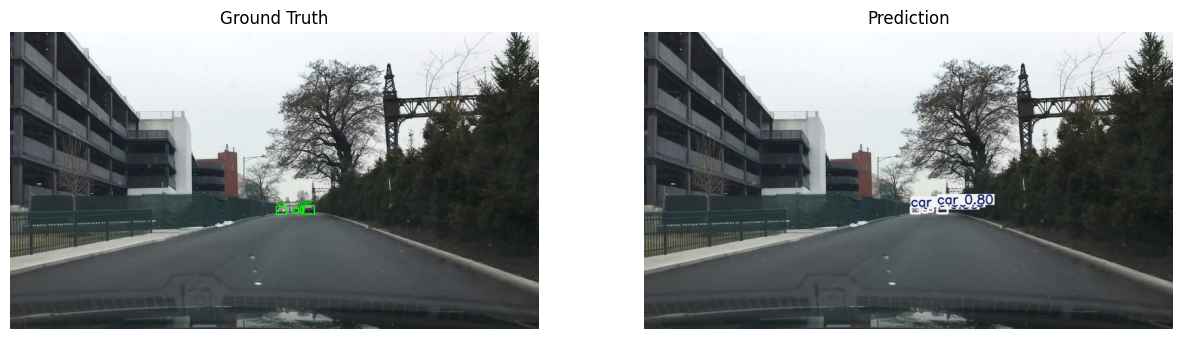

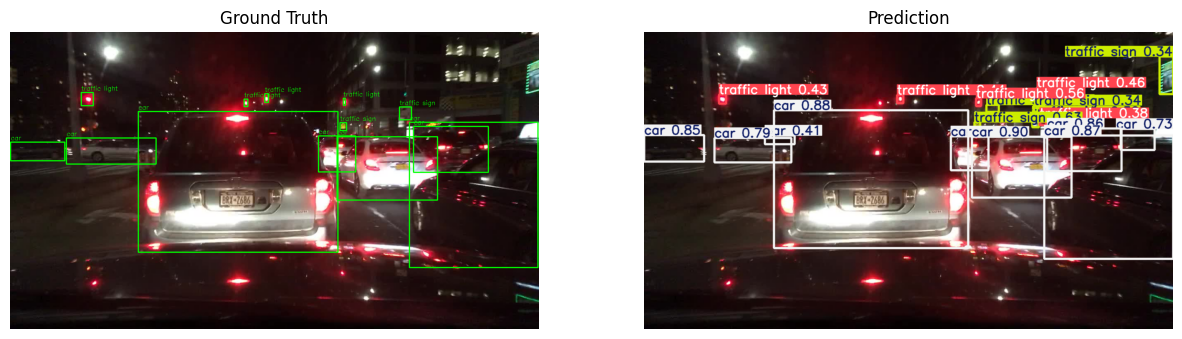

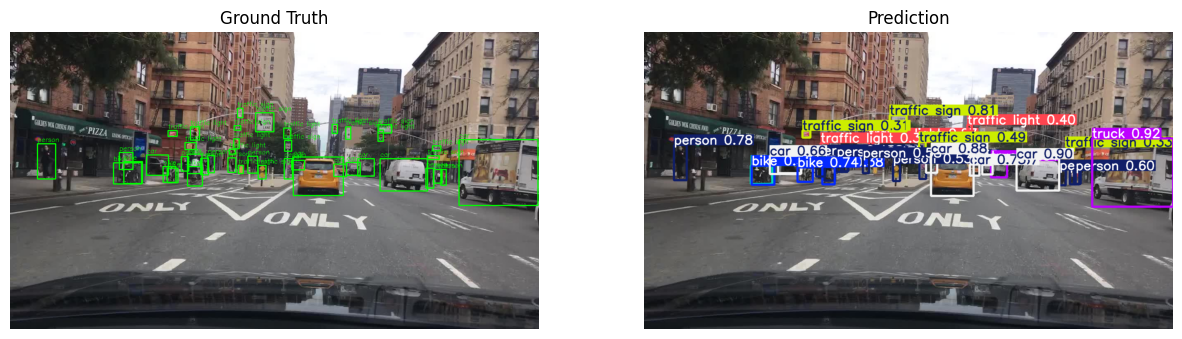

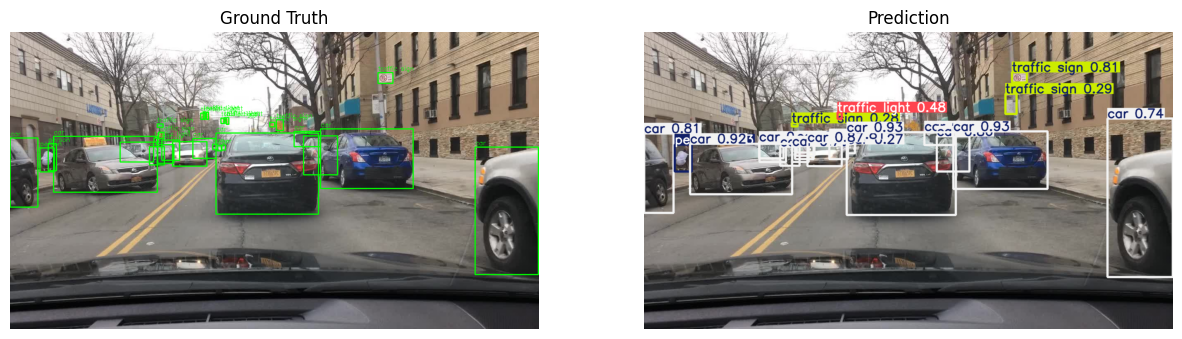

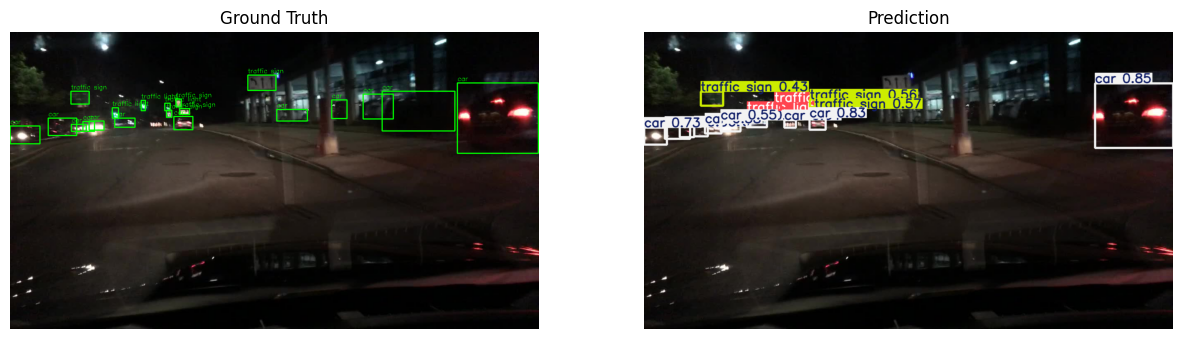

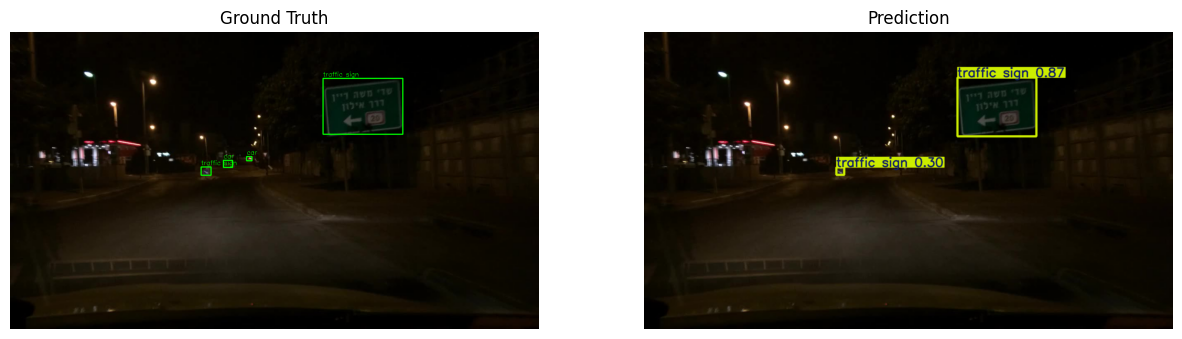

In [13]:
val_imgs_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/images"
val_labels_dir = "/kaggle/input/bdd10k-object-detection-with-yolo-format-labels/dataset/val/labels"
dataset_yaml_path = '/kaggle/working/data.yaml'

with open(dataset_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

def yolo_to_xyxy(bbox_norm, img_shape):
    h, w = img_shape[:2]
    x_c, y_c, bw, bh = bbox_norm
    x1 = int((x_c - bw / 2) * w)
    y1 = int((y_c - bh / 2) * h)
    x2 = int((x_c + bw / 2) * w)
    y2 = int((y_c + bh / 2) * h)
    return x1, y1, x2, y2

def draw_boxes(img, boxes, color=(0, 255, 0), thickness=2, labels=None):
    img_copy = img.copy()
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), color, thickness)
        if labels:
            label_text = labels[i]
            cv2.putText(img_copy, label_text, (x1, max(y1 - 5, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img_copy

all_img_names = os.listdir(val_imgs_dir)
random.shuffle(all_img_names)

sample_img_names = all_img_names[:15]

for img_name in sample_img_names:
    img_path = os.path.join(val_imgs_dir, img_name)
    label_path = os.path.join(val_labels_dir, img_name.replace('.jpg', '.txt'))

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gt_boxes = []
    gt_labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                cls_idx, *bbox = line.strip().split()
                bbox = list(map(float, bbox))
                xyxy = yolo_to_xyxy(bbox, img.shape)
                gt_boxes.append(xyxy)
                class_idx = int(cls_idx)
                gt_labels.append(class_names[class_idx]) 

    img_gt = draw_boxes(img_rgb, gt_boxes, color=(0, 255, 0), labels=gt_labels)

    results = model.predict(img_path, imgsz=640, conf=0.25, verbose=False)
    img_pred = results[0].plot() 

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    axs[0].imshow(img_gt)
    axs[0].set_title('Ground Truth')
    axs[0].axis('off')
    axs[1].imshow(img_pred[..., ::-1]) 
    axs[1].set_title('Prediction')
    axs[1].axis('off')
    plt.show()